<a href="https://colab.research.google.com/github/Harshbhatt2409/Minimal-Contrastive-Editing-/blob/main/MICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 8.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=34bf8a00164ccbdad7b53eaf95e2759e9f91fea82640a597fdd1875c1617e8a0
  Stored in directory: /root/.cache/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11352 sha256=86de114ea885e196e83abf5451476479f2e973b4dde4596495d04984a5fcab6e
  Stored in directory: /root/.cache/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeImputer
import numpy as np

# create a sample dataset with missing values
X = np.random.normal(size=(100, 5))
missing_mask = np.random.rand(*X.shape) < 0.1
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# impute missing values using MICE
imputer = IterativeImputer()
X_imputed = imputer.fit_transform(X_missing)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/AmesHousing.csv')

In [ ]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.shape

(2930, 82)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [ ]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [ ]:
from fancyimpute import IterativeImputer
import numpy as np

# create a sample dataset with missing values
df = np.random.normal(size=(100, 5))
missing_mask = np.random.rand(*df.shape) < 0.1
df_missing = df.copy()
df_missing[missing_mask] = np.nan

# impute missing values using MICE
imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df_missing)

###Task 3

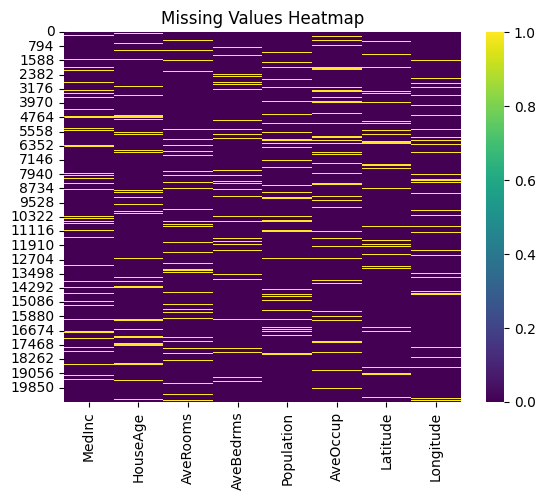

Original Dataset Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
2

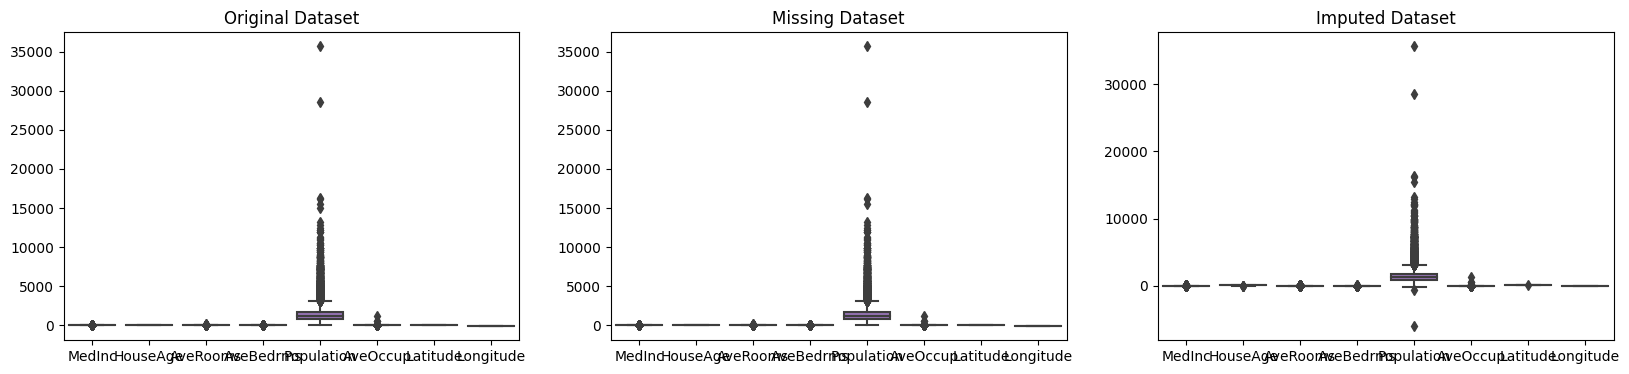

In [ ]:
# Solution
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from fancyimpute import IterativeImputer


housing = fetch_california_housing()

# Load the California Housing dataset
X = housing.data
y = housing.target
columns = housing.feature_names

# Introduce missing values in the data
missing_mask = np.random.rand(*X.shape) < 0.1
X_missing = X.copy()
X_missing[missing_mask] = np.nan

# Visualize the missing values in the dataset
sns.heatmap(pd.DataFrame(X_missing, columns=columns).isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Impute the missing values using the MICE algorithm
imputer = IterativeImputer()
X_imputed = imputer.fit_transform(X_missing)

# Compare the imputed dataset to the original dataset
X_df = pd.DataFrame(X, columns=columns)
X_missing_df = pd.DataFrame(X_missing, columns=columns)
X_imputed_df = pd.DataFrame(X_imputed, columns=columns)

print('Original Dataset Summary Statistics:')
print(X_df.describe())
print('\nMissing Dataset Summary Statistics:')
print(X_missing_df.describe())
print('\nImputed Dataset Summary Statistics:')
print(X_imputed_df.describe())

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
sns.boxplot(data=X_df, ax=axes[0])
axes[0].set_title('Original Dataset')
sns.boxplot(data=X_missing_df, ax=axes[1])
axes[1].set_title('Missing Dataset')
sns.boxplot(data=X_imputed_df, ax=axes[2])
axes[2].set_title('Imputed Dataset')
plt.show()